## Bank Telemarketing


### Problem statement:

A money-free bank conducts a telemarketing campaign every three months to promote its term deposit product to customers. Unfortunately, the previous campaign's results did not fulfil their anticipations. The marketing director wants to start a new campaign again. To do so, they'll need a thorough analysis of previous campaigns' customer behavior. Following that, the bank can concentrate its marketing efforts on such customers. This would not only help the bank to better secure deposits, but it would also improve customer happiness by minimizing unwanted marketing for specific customers.

### Objective:

As a data scientist, you must analyse the data provided to identify which factors have a significant impact on customers' deposits and then develop a predictive model that can predict whether or not customers will subscribe to a term deposit. Figure out which customers did not deposit, even though we contacted them multiple times and took the necessary steps to ensure they did not even want to make a term deposit.


### Data Description

The data contains the different attributes of customers' term deposit. The detailed data dictionary is given below.


**Data Dictionary**

1. customer_id: unique customer ID 
2. email_id: email ID of a customer
3. first_name: first name of the customer
4. last_name: last name of the customer
5. age: age of a customer
6. job: type of job (admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)
7. marital_status: marital status (divorced, married, single, unknown) 
8. education: education (basic_4y,basic_6y,basic_9y,high_school,illiterate,professional_course,university_degree,unknown)
9. defaulter: has credit in default (yes,unknown,no)
10. home_loan: customer has home loan? (yes,no,unknown)
11. personal_loan: customer has personal loan? (yes,no,unknown)
12. communication_type: customer contact communication type (cellular, telephone)
13. last_contacted: customer last contacted month (mar,apr,may,jun,jul,aug,sep,oct,nov,dec)
14. day_of_week: last contact day of the week (mon,tue,wed,thu,fri)
15. duration: last contact duration in seconds
16. cc_contact_freq: number of contacts performed in the current campaign.
17. days_since_pc: number of days that passed by after the client was last contacted from a previous campaign.
18. pc_contact_freq: number of contacts performed before this campaign.
19. pc_outcome: previous campaign outcome (failure, nonexistent, success)
20. consumer_price_index: consumer price index 
(example: When the CPI is rising it means that consumer prices are also rising, and when it falls it means consumer prices are generally falling. In short, a higher CPI indicates higher inflation, while a falling CPI indicates lower inflation, or even deflation)
21. euro_interbank_offer_rate:  Euro Interbank Offer Rate (It is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-term lending on the inter-bank market)
22. subscribed: has the customer subscribed a term deposit? (yes, no)

#### Note: cc refers to current campaign,pc refers to previous campaign.
#### Note: If you stuck at somewhere , refer MLS session and videos.

## Importing necessary libraries and data

In [2]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Library to split data
from sklearn.model_selection import train_test_split

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

from sklearn.cluster import KMeans

from scipy.stats import zscore
data = pd.read_csv("C:/Users/15612/Downloads/Bank_Telemarketing.csv")

In [3]:
# copy data frame so that changes made for the logistic regression are not changed to the original data
Ldf = data.copy()

## Data Overview

- Observations
- Shape of the data
- Data types
- Description

In [4]:
Ldf.shape

(41183, 22)

###### The data set has 41183 rows and 22 columns

In [5]:
Ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                41183 non-null  object 
 1   email_id                   41183 non-null  object 
 2   first_name                 41183 non-null  object 
 3   last_name                  41183 non-null  object 
 4   age                        41183 non-null  int64  
 5   job                        41183 non-null  object 
 6   marital_status             41183 non-null  object 
 7   education                  41183 non-null  object 
 8   defaulter                  41183 non-null  object 
 9   home_loan                  41183 non-null  object 
 10  personal_loan              41183 non-null  object 
 11  communication_type         41183 non-null  object 
 12  last_contacted             41183 non-null  object 
 13  day_of_week                41183 non-null  obj

In [6]:
Ldf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41183.0,40.026856,10.418794,18.000,32.000,38.000,47.000,98.000
duration,41183.0,258.265376,259.270273,0.000,102.000,180.000,319.000,4918.000
cc_contact_freq,41183.0,2.567637,2.770166,1.000,1.000,2.000,3.000,56.000
days_since_pc,41183.0,0.221014,1.348670,0.000,0.000,0.000,0.000,27.000
pc_contact_freq,41183.0,0.172765,0.494587,0.000,0.000,0.000,0.000,7.000
consumer_price_index,41183.0,93.575826,0.578689,92.201,93.075,93.749,93.994,94.767
euro_interbank_offer_rate,41183.0,3.621628,1.734283,0.634,1.344,4.857,4.961,5.045


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Preparing data for modeling (Train test split)
- Dropping unnecessary columns
- Any other preprocessing steps (if needed)


**Note: Write the observations from the outliers columns but don't treat them because the data is accurate, but treating them may influence the model's performance.**

In [7]:
# checking for missing values
Ldf.isna().sum()

customer_id                  0
email_id                     0
first_name                   0
last_name                    0
age                          0
job                          0
marital_status               0
education                    0
defaulter                    0
home_loan                    0
personal_loan                0
communication_type           0
last_contacted               0
day_of_week                  0
duration                     0
cc_contact_freq              0
days_since_pc                0
pc_contact_freq              0
pc_outcome                   0
consumer_price_index         0
euro_interbank_offer_rate    0
subscribed                   0
dtype: int64

In [8]:
Ldf.isnull().values.any()

False

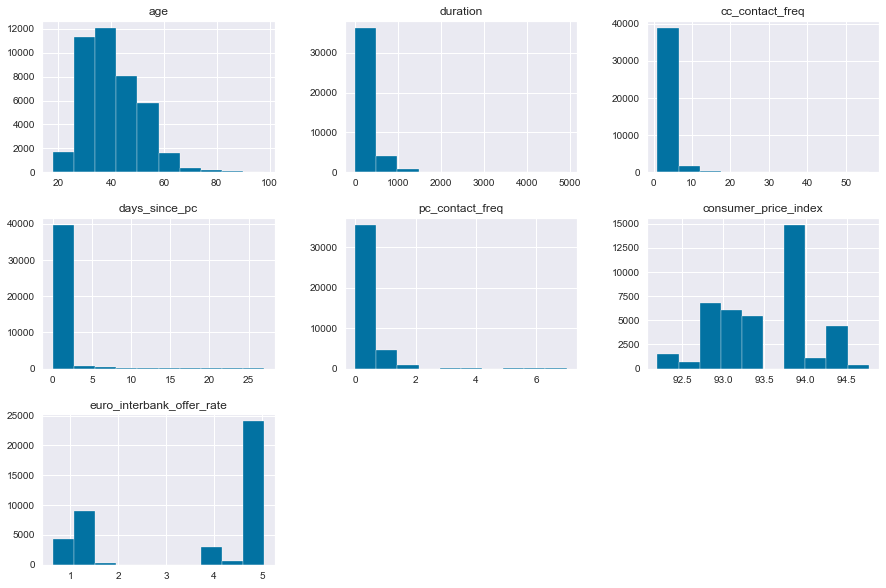

In [9]:
sns.set_style("darkgrid")
Ldf.hist(figsize=(15, 10))
plt.show()

In [10]:
Ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                41183 non-null  object 
 1   email_id                   41183 non-null  object 
 2   first_name                 41183 non-null  object 
 3   last_name                  41183 non-null  object 
 4   age                        41183 non-null  int64  
 5   job                        41183 non-null  object 
 6   marital_status             41183 non-null  object 
 7   education                  41183 non-null  object 
 8   defaulter                  41183 non-null  object 
 9   home_loan                  41183 non-null  object 
 10  personal_loan              41183 non-null  object 
 11  communication_type         41183 non-null  object 
 12  last_contacted             41183 non-null  object 
 13  day_of_week                41183 non-null  obj

In [11]:
Ldf["subscribed"] = Ldf["subscribed"].apply(lambda x: 1 if x == "yes" else 0)

In [12]:
# filtering object type columns
cat_columns = Ldf.describe(include=["object"]).columns
cat_columns

Index(['customer_id', 'email_id', 'first_name', 'last_name', 'job',
       'marital_status', 'education', 'defaulter', 'home_loan',
       'personal_loan', 'communication_type', 'last_contacted', 'day_of_week',
       'pc_outcome'],
      dtype='object')

In [13]:
for i in cat_columns: #checking for unique values
    print("Unique values in", i, "are :")
    print(Ldf[i].value_counts())
    print("*" * 50)

Unique values in customer_id are :
61e41ab36fb571a283ba252b    1
61e41ab66fb571a283ba90a0    1
61e41ab66fb571a283ba9066    1
61e41ab66fb571a283ba9067    1
61e41ab66fb571a283ba9068    1
                           ..
61e41ab56fb571a283ba5acc    1
61e41ab56fb571a283ba5acd    1
61e41ab56fb571a283ba5ace    1
61e41ab56fb571a283ba5acf    1
61e41ab76fb571a283bac60e    1
Name: customer_id, Length: 41183, dtype: int64
**************************************************
Unique values in email_id are :
yjohnson@example.org         9
osmith@example.org           8
csmith@example.org           7
dsmith@example.com           7
ljones@example.com           6
                            ..
matthewdalton@example.com    1
seanjohnson@example.net      1
thomasisaac@example.com      1
ajacobson@example.com        1
evansjames@example.com       1
Name: email_id, Length: 38279, dtype: int64
**************************************************
Unique values in first_name are :
Michael        1175
David          

In [14]:
#changing object type to category type
for feature in Ldf.columns: # Loop through all columns in the dataframe
    if Ldf[feature].dtype == 'object': # Only apply for columns with categorical strings
        Ldf[feature] = pd.Categorical(Ldf[feature])# Replace strings with an integer
Ldf.head(10)

,customer_id,email_id,first_name,last_name,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed
0,61e41ab36fb571a283ba252b,jared84@example.org,Aaron,Austin,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,0
1,61e41ab36fb571a283ba252c,gsanchez@example.net,Aaron,Gray,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,0
2,61e41ab36fb571a283ba252d,donald41@example.net,Aaron,Walker,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,0
3,61e41ab36fb571a283ba252e,ariel87@example.com,Aaron,Shelton,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,0
4,61e41ab36fb571a283ba252f,thomasjeff@example.com,Aaron,Johnson,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,0
5,61e41ab36fb571a283ba2530,rose33@example.net,Aaron,Goodman,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,0,0,nonexistent,93.994,4.857,0
6,61e41ab36fb571a283ba2531,michael78@example.com,Aaron,Johnson,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,0,nonexistent,93.994,4.857,0
7,61e41ab36fb571a283ba2532,casey36@example.org,Aaron,Preston,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,0,0,nonexistent,93.994,4.857,0
8,61e41ab36fb571a283ba2533,colonsamantha@example.com,Aaron,Davidson,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,0,nonexistent,93.994,4.857,0
9,61e41ab36fb571a283ba2534,ryanmedina@example.com,Aaron,Williams,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,0,nonexistent,93.994,4.857,0


In [15]:
Ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customer_id                41183 non-null  category
 1   email_id                   41183 non-null  category
 2   first_name                 41183 non-null  category
 3   last_name                  41183 non-null  category
 4   age                        41183 non-null  int64   
 5   job                        41183 non-null  category
 6   marital_status             41183 non-null  category
 7   education                  41183 non-null  category
 8   defaulter                  41183 non-null  category
 9   home_loan                  41183 non-null  category
 10  personal_loan              41183 non-null  category
 11  communication_type         41183 non-null  category
 12  last_contacted             41183 non-null  category
 13  day_of_week                4118

In [16]:
Ldf = Ldf.drop(['customer_id', 'email_id', 'first_name', 'last_name'], axis=1) #removing unnecessary columns with too many unique values

In [17]:
Ldf.head()

,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,0


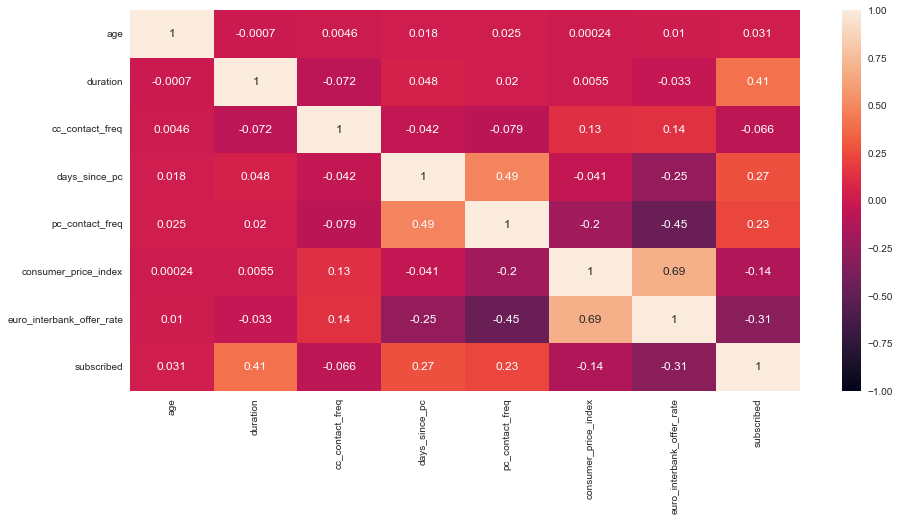

In [18]:
plt.figure(figsize=(15, 7)) #checking the correlations of each variable 
sns.heatmap(Ldf.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

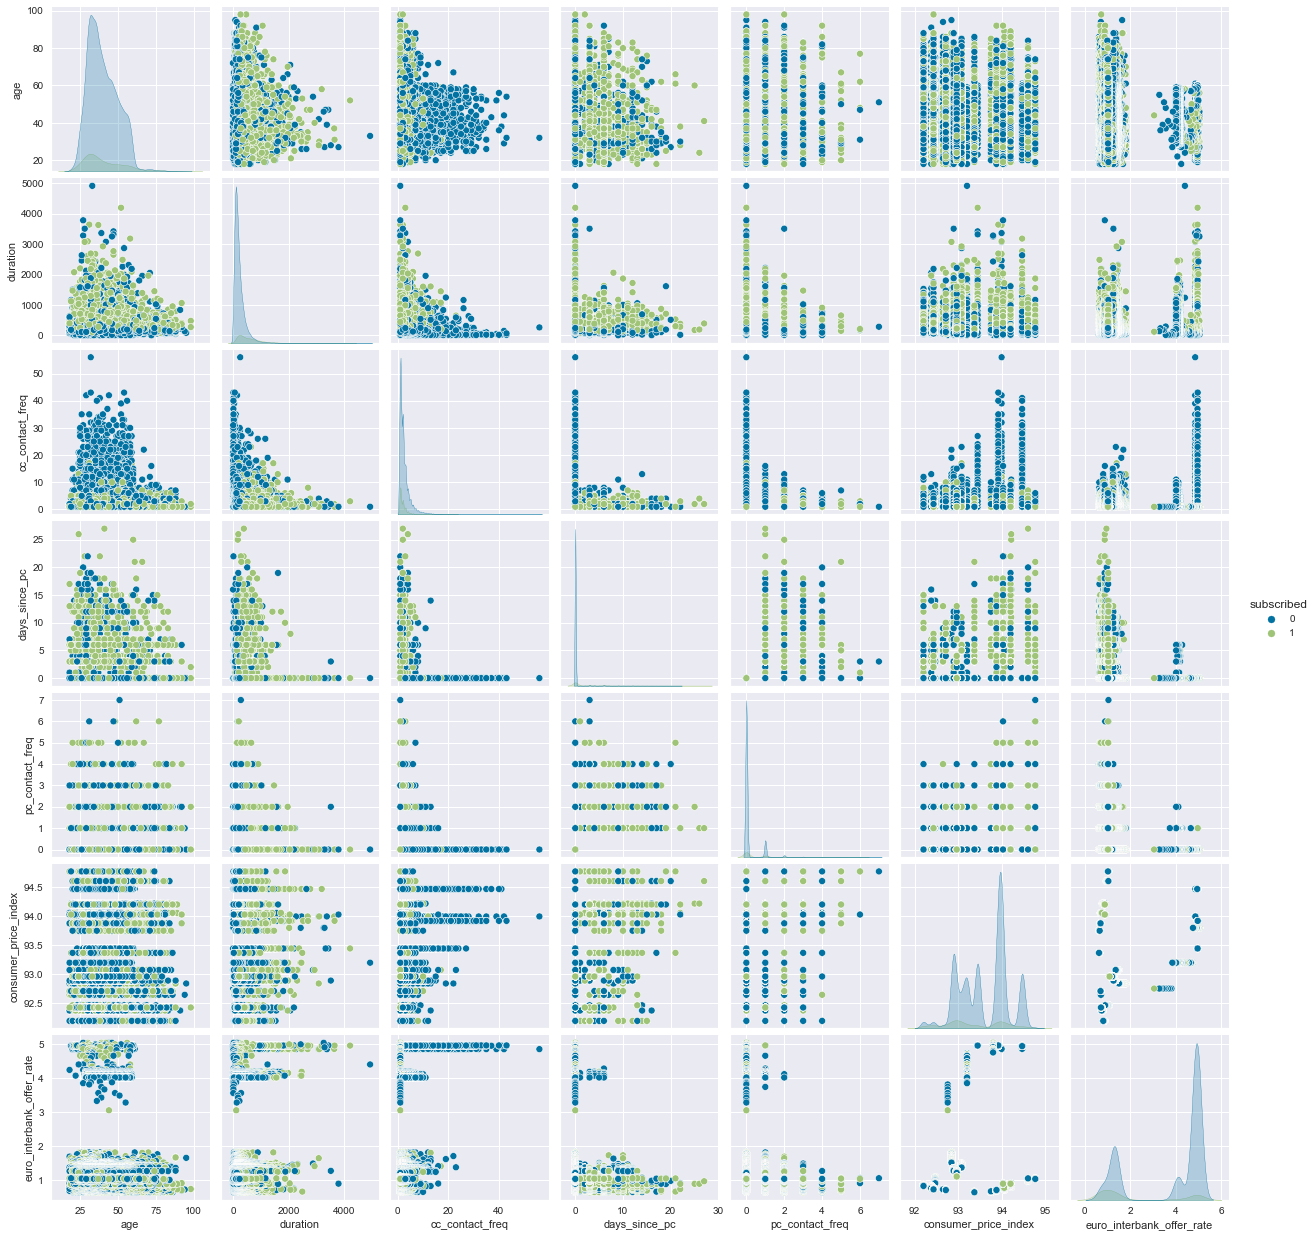

In [19]:
sns.pairplot(Ldf, hue="subscribed")
plt.show()

## Building a Logistic Regression model

In [20]:
X = Ldf.drop(["subscribed"], axis=1)
Y = Ldf["subscribed"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [21]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (28828, 51)
Shape of test set :  (12355, 51)
Percentage of classes in training set:
0    0.887366
1    0.112634
Name: subscribed, dtype: float64
Percentage of classes in test set:
0    0.887414
1    0.112586
Name: subscribed, dtype: float64


In [22]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28828
Model:                          Logit   Df Residuals:                    28778
Method:                           MLE   Df Model:                           49
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                  0.3990
Time:                        21:57:10   Log-Likelihood:                -6098.5
converged:                      False   LL-Null:                       -10147.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -25.7624      4.889     -5.270      0.000     -35.344     -16.181
age                               0.0010      0.003      0.338      0.736 

- p-value of a variable indicates if the variable is significant or not, the significance level is 0.05 (5%) so any variable with a p-value less than 0.05 would be considered significant but before removing these variables we musy check for multicollinearity. 

In [23]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [24]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [25]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.909775,0.402525,0.664126,0.501246


- The accuracy of the logistic regression is high. The precision coefficient is good while the coefficients of the recall and F1 could be improved.

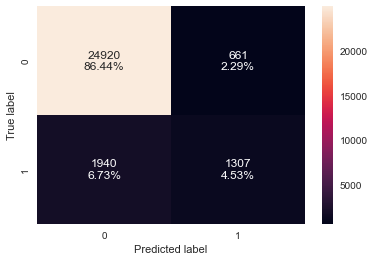

In [26]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [27]:
vif_series = pd.Series( #checking for multicollinearity
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                            1.168551e+05
age                              1.661477e+00
duration                         1.016328e+00
cc_contact_freq                  1.042912e+00
days_since_pc                    2.207148e+00
pc_contact_freq                  5.137549e+00
consumer_price_index             4.568886e+00
euro_interbank_offer_rate        5.098658e+00
job_blue-collar                  2.427597e+00
job_entrepreneur                 1.140420e+00
job_housemaid                    1.186398e+00
job_management                   1.251132e+00
job_retired                      1.470671e+00
job_self-employed                1.124104e+00
job_services                     1.434854e+00
job_student                      1.185937e+00
job_technician                   1.772899e+00
job_unemployed                   1.104409e+00
job_unknown                      1.075224e+00
marital_status_married           2.610013e+00
marital_status_single            2.915304e+00

### Observations:
- Home_loan_unknown and personal_loan_unknown exhibit high multicollinearity thus we will remove these values. Becuase they exhibit the same value removing one of these values will suffice.
- A majority of the categorical levels of a variable have VIF>5 which can simply be ignored.

In [28]:
X_train1 = X_train.drop("home_loan_unknown", axis=1) #removing home_loan_unknown
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                            116855.109100
age                                   1.661477
duration                              1.016328
cc_contact_freq                       1.042912
days_since_pc                         2.207148
pc_contact_freq                       5.137549
consumer_price_index                  4.568886
euro_interbank_offer_rate             5.098658
job_blue-collar                       2.427597
job_entrepreneur                      1.140420
job_housemaid                         1.186398
job_management                        1.251132
job_retired                           1.470671
job_self-employed                     1.124104
job_services                          1.434854
job_student                           1.185937
job_technician                        1.772899
job_unemployed                        1.104409
job_unknown                           1.075224
marital_status_married                2.610013
marital_status_single    

In [29]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

         Current function value: 0.211546
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.909775,0.402525,0.664126,0.501246


- No significant change in the model

In [30]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28828
Model:                          Logit   Df Residuals:                    28778
Method:                           MLE   Df Model:                           49
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                  0.3990
Time:                        21:57:25   Log-Likelihood:                -6098.5
converged:                      False   LL-Null:                       -10147.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -25.7624      4.889     -5.270      0.000     -35.344     -16.181
age                               0.0010      0.003      0.338      0.736 

- After checking for multicollinearity we will now remove the features with a p-value greater than 0.05 (significance level)

In [31]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'duration', 'cc_contact_freq', 'consumer_price_index', 'euro_interbank_offer_rate', 'job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_student', 'education_university.degree', 'defaulter_unknown', 'last_contacted_aug', 'last_contacted_dec', 'last_contacted_jul', 'last_contacted_jun', 'last_contacted_mar', 'last_contacted_may', 'last_contacted_nov', 'last_contacted_oct', 'last_contacted_sep', 'day_of_week_mon', 'pc_outcome_nonexistent', 'pc_outcome_success']


In [32]:
X_train2 = X_train1[selected_features]

In [33]:
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28828
Model:                          Logit   Df Residuals:                    28805
Method:                           MLE   Df Model:                           22
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                  0.3978
Time:                        21:57:32   Log-Likelihood:                -6110.8
converged:                       True   LL-Null:                       -10147.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -27.2340      4.537     -6.002      0.000     -36.127     -18.341
duration                        0.0047   8.84e-05     53.199      0.000       0.

Now no feature has p-value greater than 0.05, so we'll consider the features in X_train2 as the final ones and lg3 as final model

## Coefficient interpretations

- Coefficient of some levels of education (university degree), job (retired and student), and a successful outcome from the previous campaign are positive an increase in these will lead to increase in chances of a customer subscribing. 

- Coefficient of some typs of job (blue-collar and entrepreneur), the euro interbank offer rate, and the number of contacts performed in the current campaign (cc_contact_freq) are negative so a decrease in these will lead to increase in chances of a customer subscribing.

In [34]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,duration,cc_contact_freq,consumer_price_index,euro_interbank_offer_rate,job_blue-collar,job_entrepreneur,job_retired,job_student,education_university.degree,defaulter_unknown,last_contacted_aug,last_contacted_dec,last_contacted_jul,last_contacted_jun,last_contacted_mar,last_contacted_may,last_contacted_nov,last_contacted_oct,last_contacted_sep,day_of_week_mon,pc_outcome_nonexistent,pc_outcome_success
Odds,1.487461e-12,1.004714,0.953951,1.306930,0.489191,0.787595,0.706735,1.411920,1.402711,1.241517,0.743684,2.341546,2.151178,2.167475,1.813238,5.050852,0.571370,1.669146,2.650049,2.023916,0.813487,1.447510,5.708868
Change_odd%,-1.000000e+02,0.471440,-4.604933,30.692976,-51.080880,-21.240507,-29.326521,41.192046,40.271105,24.151672,-25.631617,134.154577,115.117797,116.747465,81.323816,405.085162,-42.863041,66.914632,165.004903,102.391600,-18.651268,44.751006,470.886819


- Holding all other features constant a 1 unit change in  the number of contacts performed in the current campaign  will decrease the odds of a customer subscribing by 0.95 times or a 4.60% decrease in odds of subscribing.
- Holding all other features constant a 1 unit change in the consumer_price_index will increase the odds of a customer subscribing by 30.6% increase in odds of subscribing.
- The odds of a customer subscribing is 51% less when there is an increase in the euro interbank offer rate
- The odds of a customer subscribing is 24% more when the customer has a university degree
- The odds of a customer subscribing is 5.7 more when there was a successful outcome from the previous campaign

#### Job type coefficient interpretations
- The odds of a customer subscribing is 0.78 times less when the customer has a blue collar job or 21.2% fewer odds of subscribing.
- The odds of a customer subscribing is 0.70 times less when the customer has a entrepreneur job or 29.3% fewer odds of subscribing.
- The odds of a customer subscribing is 41% more when the customer is retired.
- The odds of a customer subscribing is 40% more when the customer is a student.

## Model performance evaluation

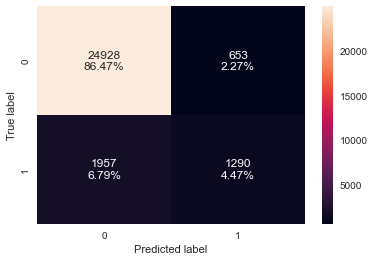

In [35]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train)

In [36]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.909463,0.39729,0.663922,0.49711


- The recall and F1 coefficients are not ideal compared to the coefficients of accuracy and precision

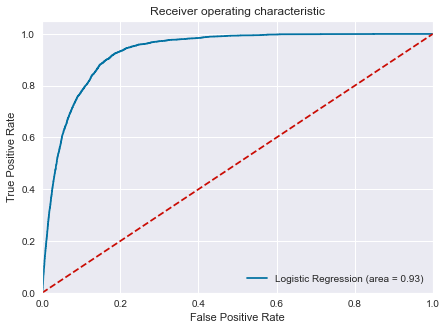

In [37]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train2)) #ROC-AUC on training set to improve F1 score
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [38]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.086737547518005


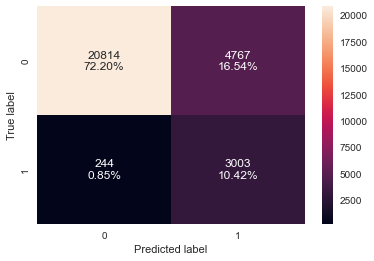

In [39]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [40]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.826176,0.924854,0.386486,0.545157


- Precision of model has decreased greatly while the F1 and recall coefficients have increased.
- The model is still giving a good performance.

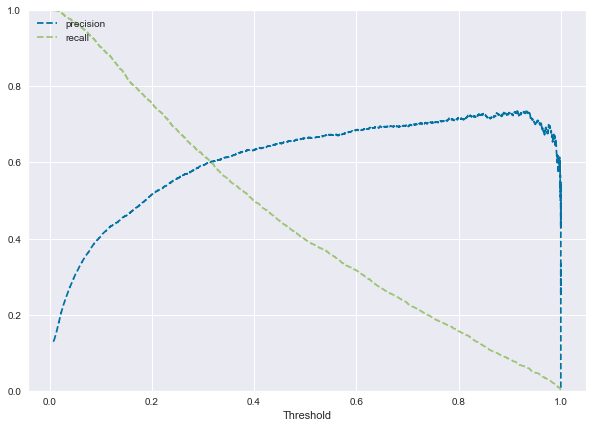

In [41]:
y_scores = lg3.predict(X_train2) #use Precision-Recall curve to see if we can find a better threshold
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At the threshold of 0.32, we get balanced recall and precision.

In [42]:
# setting the threshold
optimal_threshold_curve = 0.32

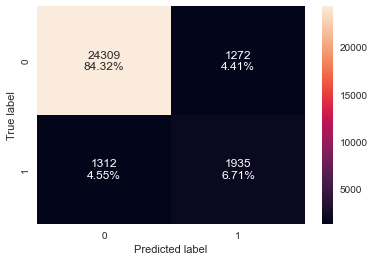

In [43]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train, threshold=optimal_threshold_curve)

In [44]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.910365,0.595935,0.603368,0.599628


- The precision level of the model has increased and have created a more balanced recall and precision.
- The model's accuracy is still good.

In [46]:
X_test2 = X_test[list(X_train2.columns)] #testing test set

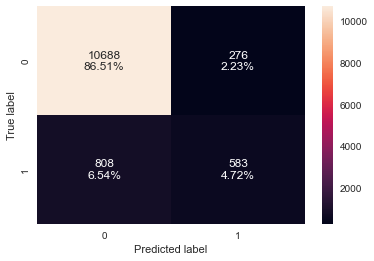

In [47]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test)

In [48]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.912262,0.419123,0.678696,0.518222


- The precision has increased and the recall and f1 levels are more balanced 
- the accuracy of the model is still very good 

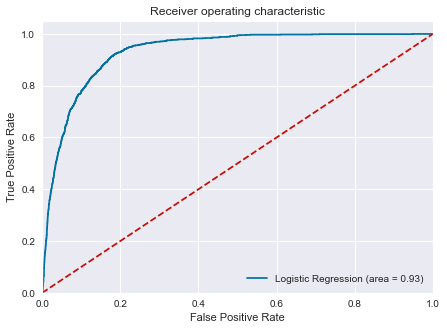

In [49]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test2)) #ROC curve on test set
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Logistic Regression-0.086 Threshold

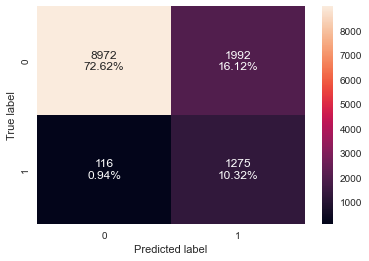

In [50]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [51]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.829381,0.916607,0.390266,0.547445


- The Precision level is low but the recall is high 
- The accuracy of the model is still good 

#### Logistic Regression-0.32 Threshold

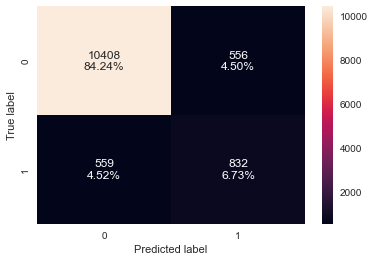

In [52]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_curve)

In [53]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.909753,0.598131,0.599424,0.598777


- All levels are balanced and good
- Accuracy of the model is also still high 

## Final Model Summary

In [54]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.086 Threshold",
    "Logistic Regression-0.32 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.086 Threshold,Logistic Regression-0.32 Threshold
Accuracy,0.909463,0.826176,0.910365
Recall,0.397290,0.924854,0.595935
Precision,0.663922,0.386486,0.603368
F1,0.497110,0.545157,0.599628


- The logistic regression with the default threshold (0.5) had the highest precision level compared to the other two logistic regressions but the recall and F1 levels were the lowest. However, the accuracy level was good in this regression. 
- The logistic regression with the threshold of 0.086 had the lowest precision level but an almost perfect recall level (the highest recall level compared to the other logistic regressions) and a higher f1 level than the the logistic regression with the default threshold. However, this logis regression had the lowest accuracy level compared to the other models. 
- The logistic regression with the threshold of 0.32 had the most balanced levels of accuracy, recall, precision, and f1 levels. This model managed to provide levels that were good for all areas while mantaining a very good accuracy level.

In [55]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.086 Threshold",
    "Logistic Regression-0.32 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.086 Threshold,Logistic Regression-0.32 Threshold
Accuracy,0.912262,0.829381,0.909753
Recall,0.419123,0.916607,0.598131
Precision,0.678696,0.390266,0.599424
F1,0.518222,0.547445,0.598777


- The observations I had made in the training models stand true for the testing set in which the logistic regression with the threshold of 0.32 kept a more balanced level for recall, precision, and f1 compared to the other logistic regressions that had higher levels of precision or recall with the cost of a low level of precision or recall (vice versa). 

## Building a Decision Tree model

In [56]:
Ddf = data.copy() #copying original data for the decision tree model 

### Decision Tree model: Preprocessing

In [57]:
Ddf.info()  #columns that are of type object need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                41183 non-null  object 
 1   email_id                   41183 non-null  object 
 2   first_name                 41183 non-null  object 
 3   last_name                  41183 non-null  object 
 4   age                        41183 non-null  int64  
 5   job                        41183 non-null  object 
 6   marital_status             41183 non-null  object 
 7   education                  41183 non-null  object 
 8   defaulter                  41183 non-null  object 
 9   home_loan                  41183 non-null  object 
 10  personal_loan              41183 non-null  object 
 11  communication_type         41183 non-null  object 
 12  last_contacted             41183 non-null  object 
 13  day_of_week                41183 non-null  obj

In [58]:
# change dtype from object to category
for feature in Ddf.columns: # Loop through all columns in the dataframe
    if Ddf[feature].dtype == 'object': # Only apply for columns with categorical strings
        Ddf[feature] = pd.Categorical(Ddf[feature])# Replace strings with an integer
Ddf.head(10)

,customer_id,email_id,first_name,last_name,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed
0,61e41ab36fb571a283ba252b,jared84@example.org,Aaron,Austin,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,no
1,61e41ab36fb571a283ba252c,gsanchez@example.net,Aaron,Gray,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,no
2,61e41ab36fb571a283ba252d,donald41@example.net,Aaron,Walker,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,no
3,61e41ab36fb571a283ba252e,ariel87@example.com,Aaron,Shelton,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,no
4,61e41ab36fb571a283ba252f,thomasjeff@example.com,Aaron,Johnson,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,no
5,61e41ab36fb571a283ba2530,rose33@example.net,Aaron,Goodman,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,0,0,nonexistent,93.994,4.857,no
6,61e41ab36fb571a283ba2531,michael78@example.com,Aaron,Johnson,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,0,nonexistent,93.994,4.857,no
7,61e41ab36fb571a283ba2532,casey36@example.org,Aaron,Preston,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,0,0,nonexistent,93.994,4.857,no
8,61e41ab36fb571a283ba2533,colonsamantha@example.com,Aaron,Davidson,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,0,nonexistent,93.994,4.857,no
9,61e41ab36fb571a283ba2534,ryanmedina@example.com,Aaron,Williams,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,0,nonexistent,93.994,4.857,no


In [59]:
Ddf = Ddf.drop(['customer_id', 'email_id', 'first_name', 'last_name'], axis=1) #dropping unnecessary columns

In [60]:
# changing the structure of the data so that the categorical data are integers so that they can be used in the decision tree
replaceStruct = { 
                "job": {"unknown": -1, "unemployed": 0, "student": 1, "admin.": 2, "blue-collar": 3, "technician": 4, "services": 5, "management": 6, "entrepreneur": 7, "housemaid": 8, "self-employed": 9, "retired": 10},
                "marital_status": {"single": 0, "married": 1, "divorced": 2, "unknown": -1},
                "education": {"unknown": -1, "illiterate": 0, "high.school": 1, "basic.4y": 2, "basic.6y":3, "basic.9y":4, "professional.course": 5, "university.degree": 6},
                "defaulter": {"no": 0, "yes": 1, "unknown": -1},
                "home_loan": {"no": 0, "yes": 1, "unknown":-1},
                 "personal_loan": {"no": 0, "yes": 1, "unknown": -1},
                 "communication_type":     {"cellular": 1, "telephone": 2},
                "last_contacted": {"mar": 1, "apr": 2, "may": 3, "jun": 4, "jul": 5, "aug": 6, "sep": 7, "oct": 8, "nov": 9, "dec": 10},
                "day_of_week":     {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5 },
                "pc_outcome":     {"nonexistent": -1, "failure": 0, "success": 1 },
                "subscribed":     {"no": 0, "yes": 1 } 
                    }
oneHotCols= {"job", "education", "last_contacted", "day_of_week"}

In [61]:
Ddf=Ddf.replace(replaceStruct)
Ddf=pd.get_dummies(Ddf, columns=oneHotCols)
Ddf.head(10)

,age,marital_status,defaulter,home_loan,personal_loan,communication_type,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed,job_2,job_3,job_7,job_8,job_6,job_10,job_9,job_5,job_1,job_4,job_0,job_-1,education_2,education_3,education_4,education_1,education_0,education_5,education_6,education_-1,last_contacted_2,last_contacted_6,last_contacted_10,last_contacted_5,last_contacted_4,last_contacted_1,last_contacted_3,last_contacted_9,last_contacted_8,last_contacted_7,day_of_week_5,day_of_week_1,day_of_week_4,day_of_week_2,day_of_week_3
0,56,1,0,0,0,2,261,1,0,0,-1,93.994,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,1,-1,0,0,2,149,1,0,0,-1,93.994,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,1,0,1,0,2,226,1,0,0,-1,93.994,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,1,0,0,0,2,151,1,0,0,-1,93.994,4.857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,1,0,0,1,2,307,1,0,0,-1,93.994,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,45,1,-1,0,0,2,198,1,0,0,-1,93.994,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,59,1,0,0,0,2,139,1,0,0,-1,93.994,4.857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,41,1,-1,0,0,2,217,1,0,0,-1,93.994,4.857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,24,0,0,1,0,2,380,1,0,0,-1,93.994,4.857,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9,25,0,0,1,0,2,50,1,0,0,-1,93.994,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [62]:
Ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        41183 non-null  int64   
 1   marital_status             41183 non-null  category
 2   defaulter                  41183 non-null  category
 3   home_loan                  41183 non-null  category
 4   personal_loan              41183 non-null  category
 5   communication_type         41183 non-null  category
 6   duration                   41183 non-null  int64   
 7   cc_contact_freq            41183 non-null  int64   
 8   days_since_pc              41183 non-null  int64   
 9   pc_contact_freq            41183 non-null  int64   
 10  pc_outcome                 41183 non-null  category
 11  consumer_price_index       41183 non-null  float64 
 12  euro_interbank_offer_rate  41183 non-null  float64 
 13  subscribed                 4118

In [63]:
X = Ddf.drop("subscribed" , axis=1) #splitting data 
y = Ddf.pop("subscribed")

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1) #splitting data

In [65]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) #building decision tree model
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [167]:
a_decision_tree_perf_train = dTree.score(X_train, y_train)
a_decision_tree_perf_test = dTree.score(X_test, y_test)
print("Accuracy on training set : ",dTree.score(X_train, y_train)) #scoring decision tree model
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.8895993524888709


88% accuracy on testing set

In [67]:
##  Function to calculate recall score
def get_recall_score(dTree, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = dTree.predict(predictors)
    return recall_score(target, prediction)

In [68]:
## function to create confusion matrix
def confusion_matrix_sklearn(dTree, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = dTree.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    sns.set(rc={'figure.figsize':(6,4)})
    ax = sns.heatmap(cm, annot=labels, fmt="")
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")

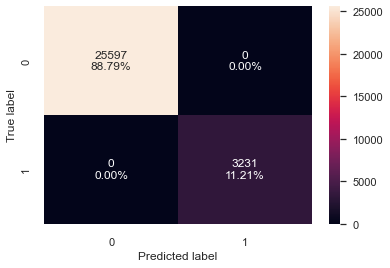

In [69]:
confusion_matrix_sklearn(dTree, X_train, y_train)

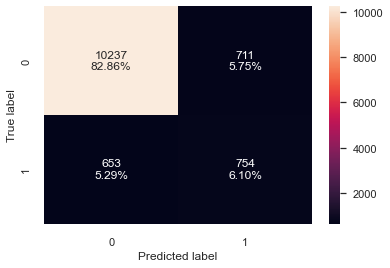

In [158]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [157]:
decision_tree_perf_train = get_recall_score(dTree, X_train, y_train)
decision_tree_perf_test = get_recall_score(dTree, X_test, y_test)
print("Recall Score on training set:", decision_tree_perf_train)
print("Recall Score on testing set:", decision_tree_perf_test)

Recall Score on training set: 1.0
Recall Score on testing set: 0.5358919687277897


- The Decision Tree is able to perfectly classify all the data points on the training set.
- 0 errors on the training set, each sample has been classified correctly.

### Visualizing the Decision Tree

In [73]:
feature_names = list(X.columns)
print(feature_names)

['age', 'marital_status', 'defaulter', 'home_loan', 'personal_loan', 'communication_type', 'duration', 'cc_contact_freq', 'days_since_pc', 'pc_contact_freq', 'pc_outcome', 'consumer_price_index', 'euro_interbank_offer_rate', 'job_2', 'job_3', 'job_7', 'job_8', 'job_6', 'job_10', 'job_9', 'job_5', 'job_1', 'job_4', 'job_0', 'job_-1', 'education_2', 'education_3', 'education_4', 'education_1', 'education_0', 'education_5', 'education_6', 'education_-1', 'last_contacted_2', 'last_contacted_6', 'last_contacted_10', 'last_contacted_5', 'last_contacted_4', 'last_contacted_1', 'last_contacted_3', 'last_contacted_9', 'last_contacted_8', 'last_contacted_7', 'day_of_week_5', 'day_of_week_1', 'day_of_week_4', 'day_of_week_2', 'day_of_week_3']


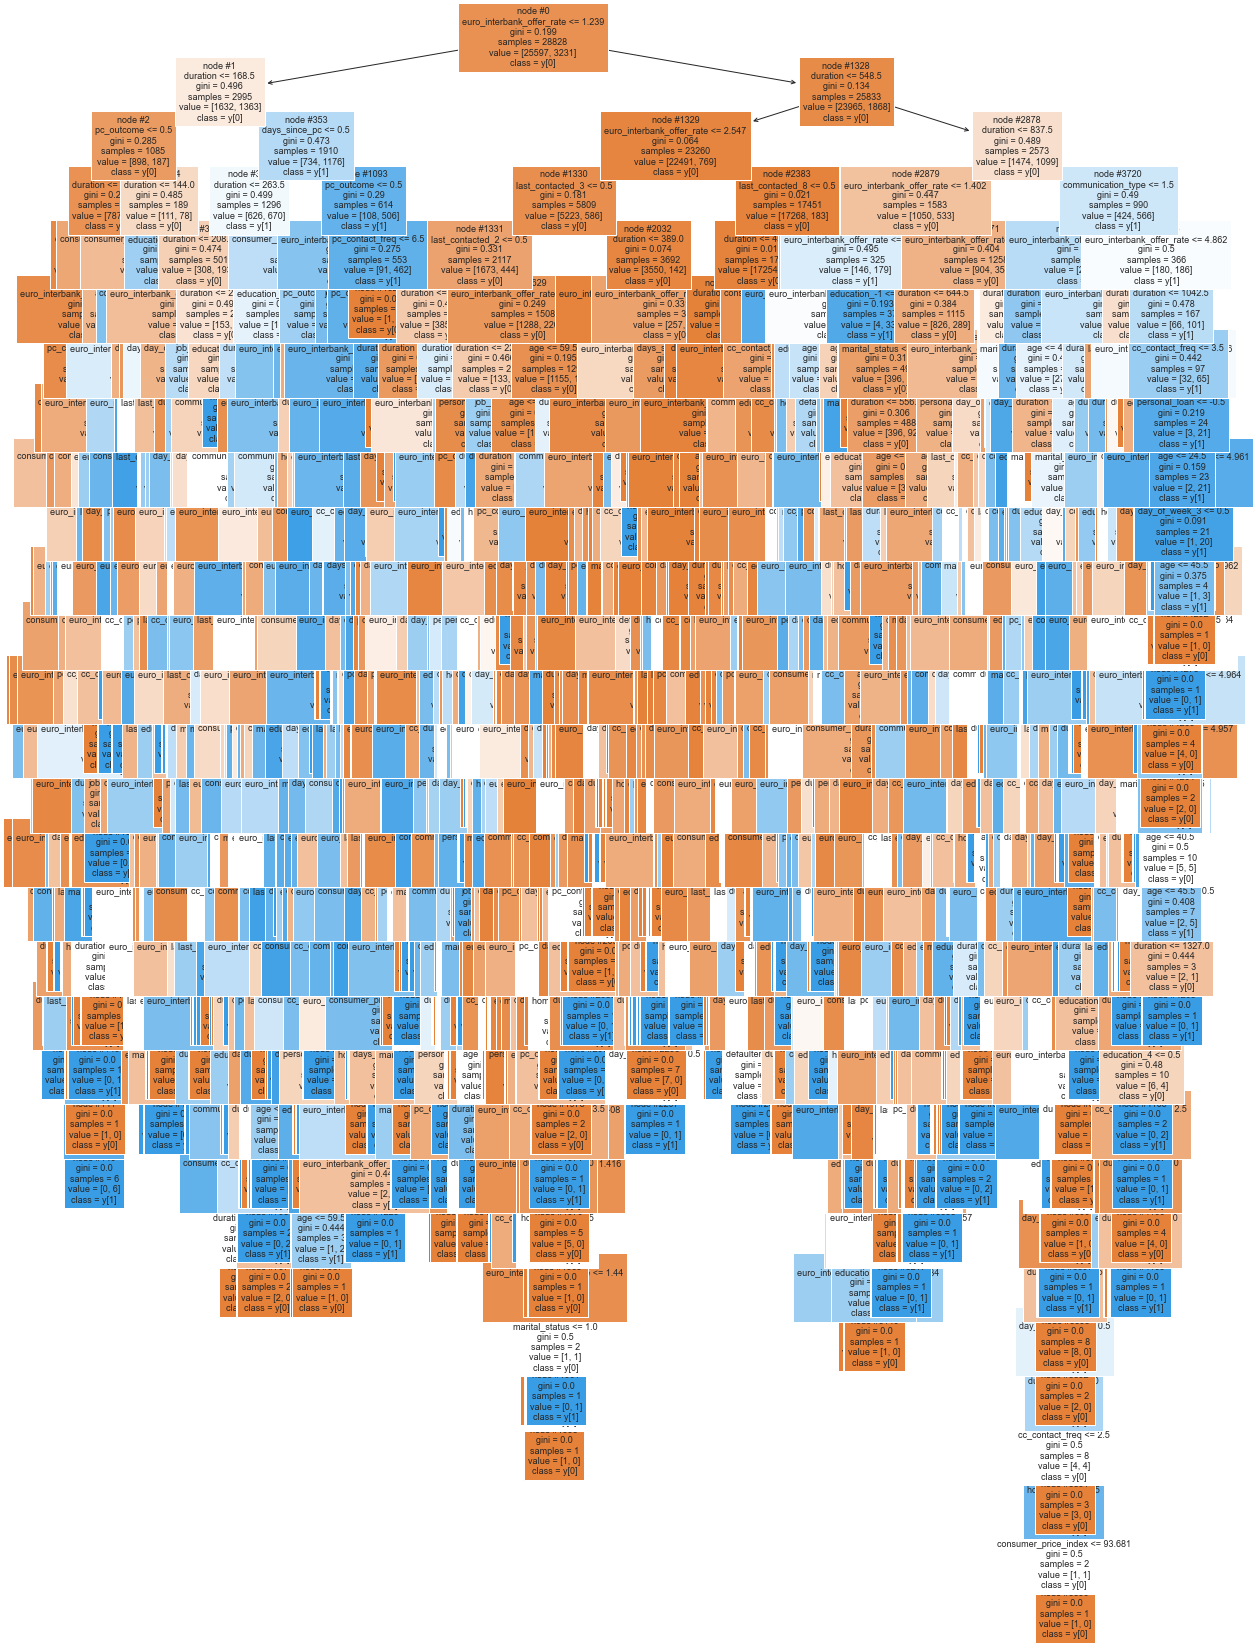

In [74]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [75]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- euro_interbank_offer_rate <= 1.24
|   |--- duration <= 168.50
|   |   |--- pc_outcome <= 0.50
|   |   |   |--- duration <= 123.50
|   |   |   |   |--- duration <= 77.50
|   |   |   |   |   |--- last_contacted_9 <= 0.50
|   |   |   |   |   |   |--- job_5 <= 0.50
|   |   |   |   |   |   |   |--- weights: [186.00, 0.00] class: 0
|   |   |   |   |   |   |--- job_5 >  0.50
|   |   |   |   |   |   |   |--- day_of_week_2 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- day_of_week_2 >  0.50
|   |   |   |   |   |   |   |   |--- consumer_price_index <= 93.29
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- consumer_price_index >  93.29
|   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |--- last_contacted_9 >  0.50
|   |   |   |   |   |   |--- age <= 29.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |  

- The tree above is very complex and difficult to interpret. The tree must be pruned.

In [76]:
# checking the important features in Tree Building
feature_importance = pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
print(feature_importance)

                                Imp
duration                   0.334241
euro_interbank_offer_rate  0.229434
age                        0.088883
cc_contact_freq            0.037854
days_since_pc              0.020424
last_contacted_3           0.016425
home_loan                  0.016054
marital_status             0.015804
consumer_price_index       0.014364
pc_outcome                 0.012386
education_6                0.011622
personal_loan              0.010848
education_5                0.010268
last_contacted_8           0.009656
education_1                0.009442
job_2                      0.009217
communication_type         0.008942
job_4                      0.008546
day_of_week_5              0.008398
last_contacted_2           0.008296
day_of_week_2              0.008076
pc_contact_freq            0.008005
day_of_week_3              0.007620
day_of_week_4              0.007557
job_5                      0.007018
education_2                0.006755
education_4                0

- According to the decision tree model, duration is the most important variable followed by euro_interbank_offer_rate for predicting the Subscription

In [77]:
# Using Grid search to compute the optimum values of hyperparameters.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1,
                       splitter='random')

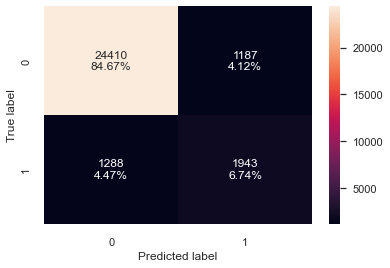

In [78]:
confusion_matrix_sklearn(estimator, X_train, y_train) #checking performance on training set 

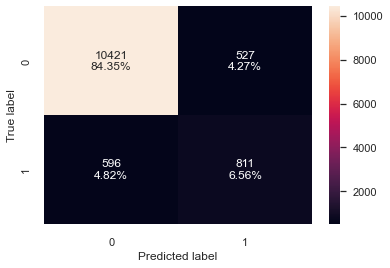

In [80]:
confusion_matrix_sklearn(estimator, X_test, y_test) #checking performance on testing set

In [162]:
a_decision_tree_tune_perf_train = estimator.score(X_train, y_train)
a_decision_tree_tune_perf_test = estimator.score(X_test, y_test)
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Accuracy on training set : ",a_decision_tree_tune_perf_train)
print("Recall Score on training set:",decision_tree_tune_perf_train)
print("Accuracy on test set : ",a_decision_tree_tune_perf_test)
print("Recall Score on test set:",decision_tree_tune_perf_test)

Accuracy on training set :  0.9141459691966144
Recall Score on training set: 0.6013618074899412
Accuracy on test set :  0.909105625252934
Recall Score on test set: 0.5764036958066808


- After applying the optimum hyper parameters to the decision tree The recall score has definitely increased and the accuracy of the model still remains very good

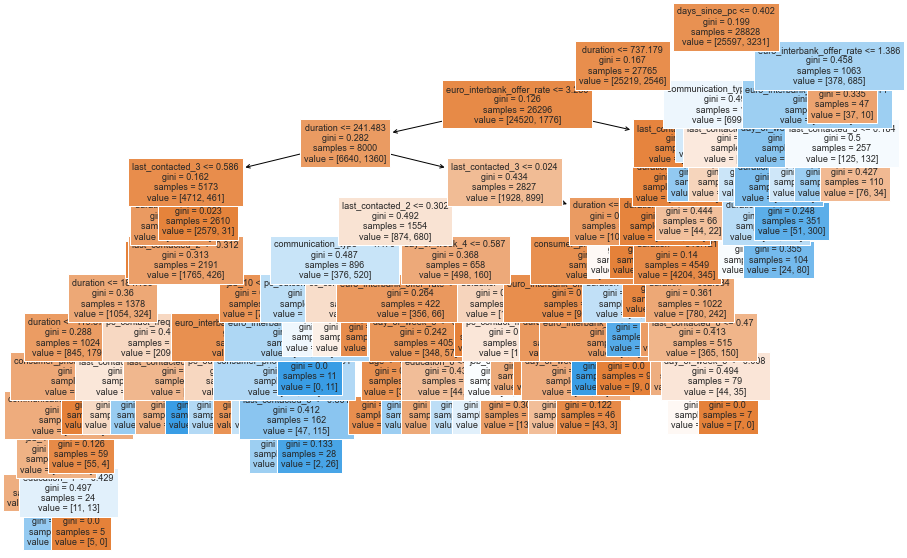

In [82]:
sns.set(rc={'figure.figsize':(15,10)})
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

In [83]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- days_since_pc <= 0.40
|   |--- duration <= 737.18
|   |   |--- euro_interbank_offer_rate <= 3.29
|   |   |   |--- duration <= 241.48
|   |   |   |   |--- last_contacted_3 <= 0.59
|   |   |   |   |   |--- duration <= 71.02
|   |   |   |   |   |   |--- weights: [368.00, 4.00] class: 0
|   |   |   |   |   |--- duration >  71.02
|   |   |   |   |   |   |--- last_contacted_2 <= 0.31
|   |   |   |   |   |   |   |--- duration <= 184.15
|   |   |   |   |   |   |   |   |--- duration <= 119.58
|   |   |   |   |   |   |   |   |   |--- weights: [427.00, 48.00] class: 0
|   |   |   |   |   |   |   |   |--- duration >  119.58
|   |   |   |   |   |   |   |   |   |--- consumer_price_index <= 94.39
|   |   |   |   |   |   |   |   |   |   |--- communication_type <= 1.93
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- communication_type >  1.93
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [55.00, 4.00] class: 0
| 

In [84]:
# Seeing if the important features have changed 
feature_importance = pd.DataFrame(
    estimator.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)

print(feature_importance)


                                Imp
duration                   0.429536
days_since_pc              0.256156
euro_interbank_offer_rate  0.122333
last_contacted_3           0.072744
last_contacted_2           0.040367
last_contacted_8           0.016396
day_of_week_4              0.009095
consumer_price_index       0.008492
communication_type         0.007635
defaulter                  0.003633
job_10                     0.003337
pc_contact_freq            0.003291
pc_outcome                 0.003284
day_of_week_1              0.003014
last_contacted_4           0.002816
day_of_week_3              0.002108
last_contacted_6           0.001761
last_contacted_1           0.001684
age                        0.001573
education_-1               0.001518
job_5                      0.001477
job_1                      0.001437
last_contacted_5           0.001326
cc_contact_freq            0.001282
last_contacted_10          0.001245
day_of_week_5              0.001235
education_6                0

- In the tuned decision tree duration is the most important feature followed by days_since_pc

## Do we need to prune the tree?

## Cost Complexity Pruning

In [85]:
clf = DecisionTreeClassifier(random_state=1) #finding the effective alphas
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [86]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000014,0.000069
2,0.000017,0.000138
3,0.000017,0.000208
4,0.000017,0.000277
...,...,...
896,0.002604,0.134630
897,0.002726,0.137357
898,0.009436,0.146793
899,0.024959,0.171752


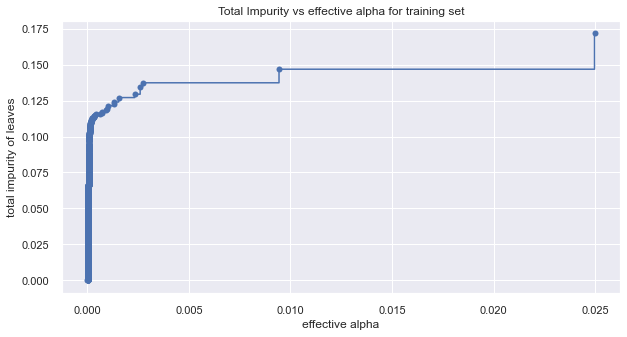

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [88]:
clfs = [] # train decision tree using the effective alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.027281852697797315


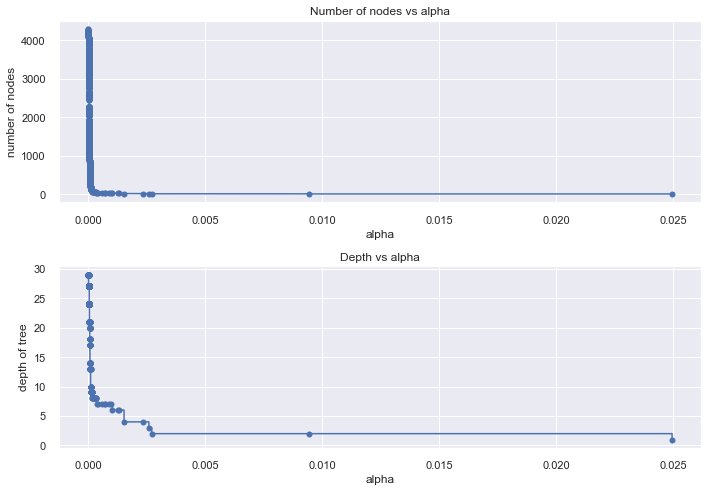

In [89]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [90]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [91]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [92]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

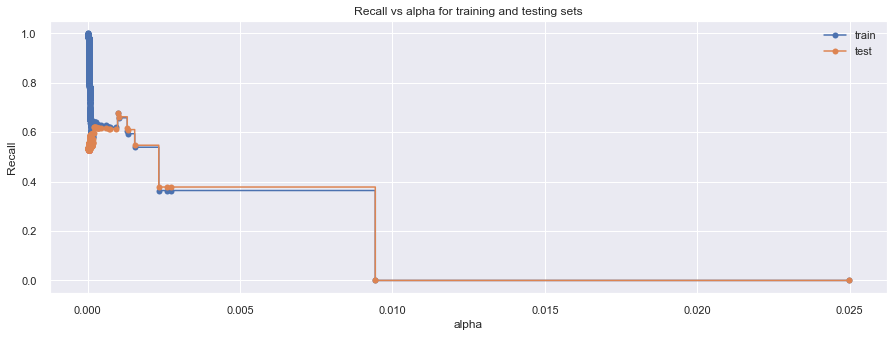

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [94]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000983477494594289, random_state=1)


In [95]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000983477494594289, random_state=1)

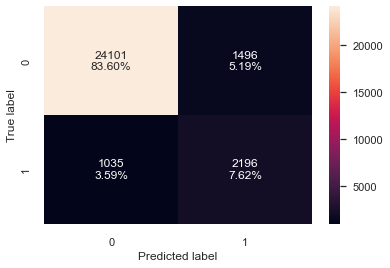

In [96]:
confusion_matrix_sklearn(best_model, X_train, y_train)

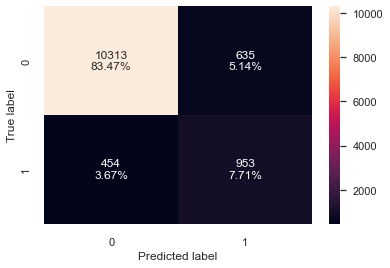

In [98]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [166]:
a_decision_tree_postpruned_perf_train = best_model.score(X_train, y_train)
a_decision_tree_postpruned_perf_test = best_model.score(X_test, y_test)
decision_tree_postpruned_perf_test = get_recall_score(best_model, X_test, y_test)
decision_tree_postpruned_perf_train = get_recall_score(best_model, X_train, y_train)
print("Accuracy on training set : ",a_decision_tree_postpruned_perf_train)
print("Recall Score on training set:",decision_tree_postpruned_perf_train)
print("Accuracy on test set : ",a_decision_tree_tune_perf_test)
print("Recall Score on test set:",decision_tree_postpruned_perf_test)

Accuracy on training set :  0.9122034133481337
Recall Score on training set: 0.6796657381615598
Accuracy on test set :  0.909105625252934
Recall Score on test set: 0.6773276474769012


- After pruning the decision tree the recall score for both the training set and test set are not only higher but a lot more consistent. Before the training set would have a really high recall score but when the model was applied to the testing set the recall score was lower for the testing set. However, after pruning the recall scores remain consistent within both the training and testing set. The accuracy of the model continues to be good. 

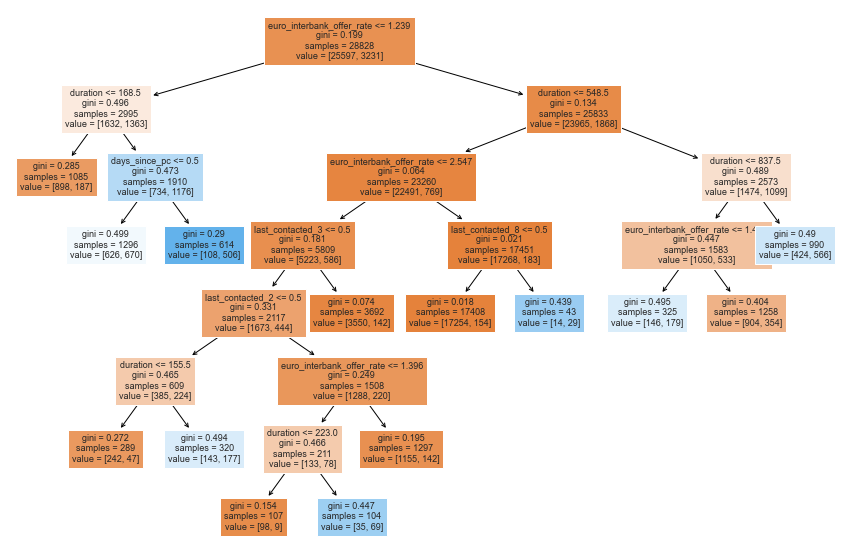

In [100]:
sns.set(rc={'figure.figsize':(15,10)}) #visualizing the decision tree after pruning

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

- After pruning the decision tree there is less cluster and the tree is readable

In [154]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- euro_interbank_offer_rate <= 1.24
|   |--- duration <= 168.50
|   |   |--- weights: [898.00, 187.00] class: 0
|   |--- duration >  168.50
|   |   |--- days_since_pc <= 0.50
|   |   |   |--- weights: [626.00, 670.00] class: 1
|   |   |--- days_since_pc >  0.50
|   |   |   |--- weights: [108.00, 506.00] class: 1
|--- euro_interbank_offer_rate >  1.24
|   |--- duration <= 548.50
|   |   |--- euro_interbank_offer_rate <= 2.55
|   |   |   |--- last_contacted_3 <= 0.50
|   |   |   |   |--- last_contacted_2 <= 0.50
|   |   |   |   |   |--- duration <= 155.50
|   |   |   |   |   |   |--- weights: [242.00, 47.00] class: 0
|   |   |   |   |   |--- duration >  155.50
|   |   |   |   |   |   |--- weights: [143.00, 177.00] class: 1
|   |   |   |   |--- last_contacted_2 >  0.50
|   |   |   |   |   |--- euro_interbank_offer_rate <= 1.40
|   |   |   |   |   |   |--- duration <= 223.00
|   |   |   |   |   |   |   |--- weights: [98.00, 9.00] class: 0
|   |   |   |   |   |   |--- duration >  223.00


In [155]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
duration                   0.496198
euro_interbank_offer_rate  0.400143
last_contacted_3           0.034341
days_since_pc              0.034194
last_contacted_2           0.018591
last_contacted_8           0.016533
last_contacted_5           0.000000
education_1                0.000000
education_0                0.000000
education_5                0.000000
education_6                0.000000
education_-1               0.000000
last_contacted_6           0.000000
last_contacted_10          0.000000
age                        0.000000
last_contacted_4           0.000000
last_contacted_1           0.000000
education_3                0.000000
last_contacted_9           0.000000
last_contacted_7           0.000000
day_of_week_5              0.000000
day_of_week_1              0.000000
day_of_week_4              0.000000
day_of_week_2              0.000000
education_4                0.000000
job_-1                     0.000000
education_2                0

- After pruning the decision tree the most important feature is the duration then the euro interbank offer rate

## Model Performance Comparison and Conclusions

In [101]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train 
        
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.601362
2,0.679666


In [102]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.535892
1,0.576404
2,0.677328


In [168]:
models_train_comp_df = pd.DataFrame(
    [
        a_decision_tree_perf_train,
        a_decision_tree_tune_perf_train,
        a_decision_tree_postpruned_perf_train 
        
    ],
    columns=["Accuracy on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Accuracy on training set
0,1.000000
1,0.914146
2,0.912203


In [169]:
models_train_comp_df = pd.DataFrame(
    [
        a_decision_tree_perf_test,
        a_decision_tree_tune_perf_test,
        a_decision_tree_postpruned_perf_test 
        
    ],
    columns=["Accuracy on testing set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Accuracy on testing set
0,0.889599
1,0.909106
2,0.911858


- The decision tree post-pruning gives us the highest recall and accuracy for both the training and testing set. The post-pruning tree gives us a recall score of 0.67 and an accuracy score of 0.91 in the data's testing set.

## K-means Clustering

In [103]:
Kdf = data.copy() #copying the original data set for kmeans clustering preprocessing 

In [104]:
Kdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                41183 non-null  object 
 1   email_id                   41183 non-null  object 
 2   first_name                 41183 non-null  object 
 3   last_name                  41183 non-null  object 
 4   age                        41183 non-null  int64  
 5   job                        41183 non-null  object 
 6   marital_status             41183 non-null  object 
 7   education                  41183 non-null  object 
 8   defaulter                  41183 non-null  object 
 9   home_loan                  41183 non-null  object 
 10  personal_loan              41183 non-null  object 
 11  communication_type         41183 non-null  object 
 12  last_contacted             41183 non-null  object 
 13  day_of_week                41183 non-null  obj

In [105]:
Kdf["subscribed"] = Kdf["subscribed"].apply(lambda x: 1 if x == "yes" else 0) #changing the subscribed feature to an int data type

In [106]:
#changing features with dtype object to categorical data 
for feature in Kdf.columns: # Loop through all columns in the dataframe
    if Kdf[feature].dtype == 'object': # Only apply for columns with categorical strings
        Kdf[feature] = pd.Categorical(Kdf[feature])# Replace strings with an integer
Kdf.head(10)

,customer_id,email_id,first_name,last_name,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed
0,61e41ab36fb571a283ba252b,jared84@example.org,Aaron,Austin,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,0
1,61e41ab36fb571a283ba252c,gsanchez@example.net,Aaron,Gray,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,0
2,61e41ab36fb571a283ba252d,donald41@example.net,Aaron,Walker,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,0
3,61e41ab36fb571a283ba252e,ariel87@example.com,Aaron,Shelton,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,0
4,61e41ab36fb571a283ba252f,thomasjeff@example.com,Aaron,Johnson,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,0
5,61e41ab36fb571a283ba2530,rose33@example.net,Aaron,Goodman,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,0,0,nonexistent,93.994,4.857,0
6,61e41ab36fb571a283ba2531,michael78@example.com,Aaron,Johnson,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,0,nonexistent,93.994,4.857,0
7,61e41ab36fb571a283ba2532,casey36@example.org,Aaron,Preston,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,0,0,nonexistent,93.994,4.857,0
8,61e41ab36fb571a283ba2533,colonsamantha@example.com,Aaron,Davidson,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,0,nonexistent,93.994,4.857,0
9,61e41ab36fb571a283ba2534,ryanmedina@example.com,Aaron,Williams,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,0,nonexistent,93.994,4.857,0


In [107]:
Kdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customer_id                41183 non-null  category
 1   email_id                   41183 non-null  category
 2   first_name                 41183 non-null  category
 3   last_name                  41183 non-null  category
 4   age                        41183 non-null  int64   
 5   job                        41183 non-null  category
 6   marital_status             41183 non-null  category
 7   education                  41183 non-null  category
 8   defaulter                  41183 non-null  category
 9   home_loan                  41183 non-null  category
 10  personal_loan              41183 non-null  category
 11  communication_type         41183 non-null  category
 12  last_contacted             41183 non-null  category
 13  day_of_week                4118

In [108]:
Kdf = Kdf.drop(['customer_id', 'email_id', 'first_name', 'last_name', 'job', 'education', 'last_contacted', 'day_of_week', 'age', 'marital_status', 'defaulter', 'home_loan', 'communication_type', 'pc_outcome', 'personal_loan'], axis=1) #dropping data type that is category type

In [109]:
Kdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   41183 non-null  int64  
 1   cc_contact_freq            41183 non-null  int64  
 2   days_since_pc              41183 non-null  int64  
 3   pc_contact_freq            41183 non-null  int64  
 4   consumer_price_index       41183 non-null  float64
 5   euro_interbank_offer_rate  41183 non-null  float64
 6   subscribed                 41183 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.2 MB


In [110]:
Kdf.describe() #identifying outliers 

,duration,cc_contact_freq,days_since_pc,pc_contact_freq,consumer_price_index,euro_interbank_offer_rate,subscribed
count,41183.000000,41183.000000,41183.000000,41183.000000,41183.000000,41183.000000,41183.000000
mean,258.265376,2.567637,0.221014,0.172765,93.575826,3.621628,0.112619
std,259.270273,2.770166,1.348670,0.494587,0.578689,1.734283,0.316131
min,0.000000,1.000000,0.000000,0.000000,92.201000,0.634000,0.000000
25%,102.000000,1.000000,0.000000,0.000000,93.075000,1.344000,0.000000
50%,180.000000,2.000000,0.000000,0.000000,93.749000,4.857000,0.000000
75%,319.000000,3.000000,0.000000,0.000000,93.994000,4.961000,0.000000
max,4918.000000,56.000000,27.000000,7.000000,94.767000,5.045000,1.000000


Outliers
- The feature domain has a mean of 258 but a max of 4918 meaning there are outliers present.
- The feature cc_contact_freq has a mean of 2.56 but a max of 56 meaning there are outliers present. 
- The feature days_since_pc also has outliers present, as we can see the max is 27 while the mean is 0.17. 


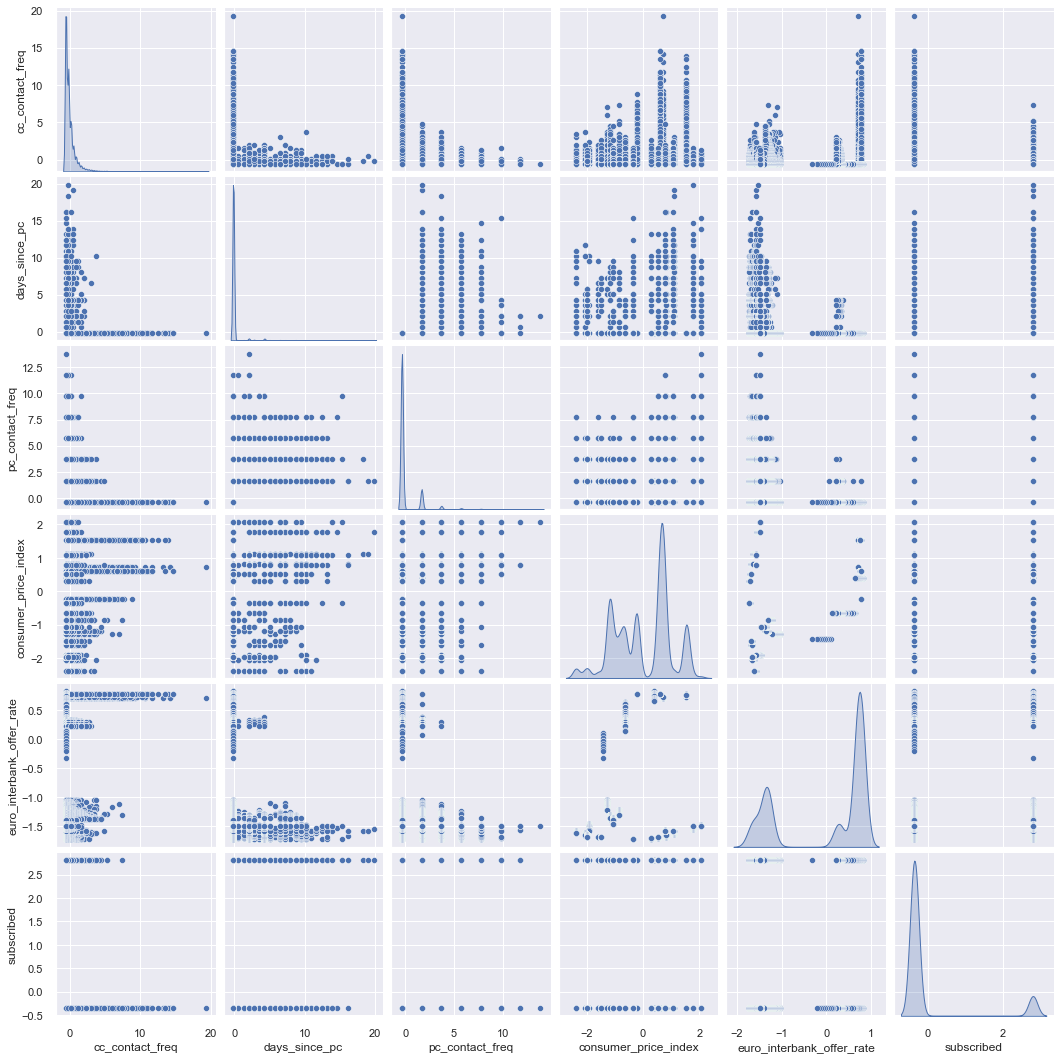

In [111]:
KdfAttr=Kdf.iloc[:,1:] #scaling the data
KdfScaled=KdfAttr.apply(zscore)
sns.pairplot(KdfScaled,diag_kind='kde')

Number of Clusters: 1 	Average Distortion: 2.0103520655974556
Number of Clusters: 2 	Average Distortion: 1.5206346272231168
Number of Clusters: 3 	Average Distortion: 1.3942349141394266
Number of Clusters: 4 	Average Distortion: 1.2323908520436628
Number of Clusters: 5 	Average Distortion: 1.127802565540732
Number of Clusters: 6 	Average Distortion: 0.9921795794693904
Number of Clusters: 7 	Average Distortion: 0.8832315895226921
Number of Clusters: 8 	Average Distortion: 0.853142120130552
Number of Clusters: 9 	Average Distortion: 0.7958032241958545


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

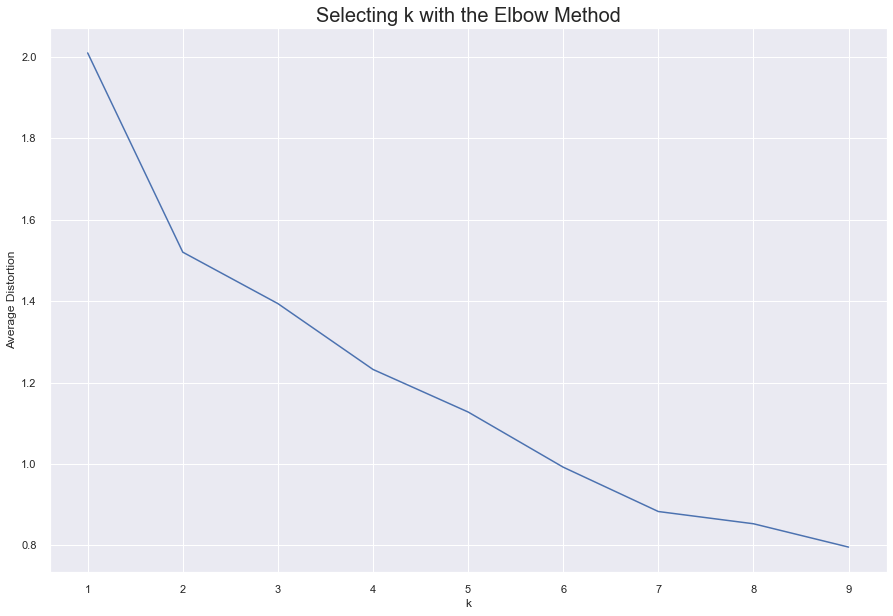

In [112]:
#Finding optimal no. of clusters
clusters = range(1, 10)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(KdfScaled)  # Fit kMeans on the data
    prediction = model.predict(KdfScaled)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(KdfScaled, model.cluster_centers_, "euclidean"), axis=1))
        / KdfScaled.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

- In the above plot, although the elbow bend is not coming out clearly as there are more than one bends the elbow is seen for K=3 and 7 but if you observe the Average distortion results there is also some drop in distortion at K= 6. We will use  silhouette score fto analyze the quality of each cluster. 

For n_clusters = 2, silhouette score is 0.45298107141076277
For n_clusters = 3, silhouette score is 0.46513152567595045
For n_clusters = 4, silhouette score is 0.503190119469444
For n_clusters = 5, silhouette score is 0.5252885192199953
For n_clusters = 6, silhouette score is 0.5422356884014095
For n_clusters = 7, silhouette score is 0.4637606742495733
For n_clusters = 8, silhouette score is 0.46934501989345645
For n_clusters = 9, silhouette score is 0.48954347494942463


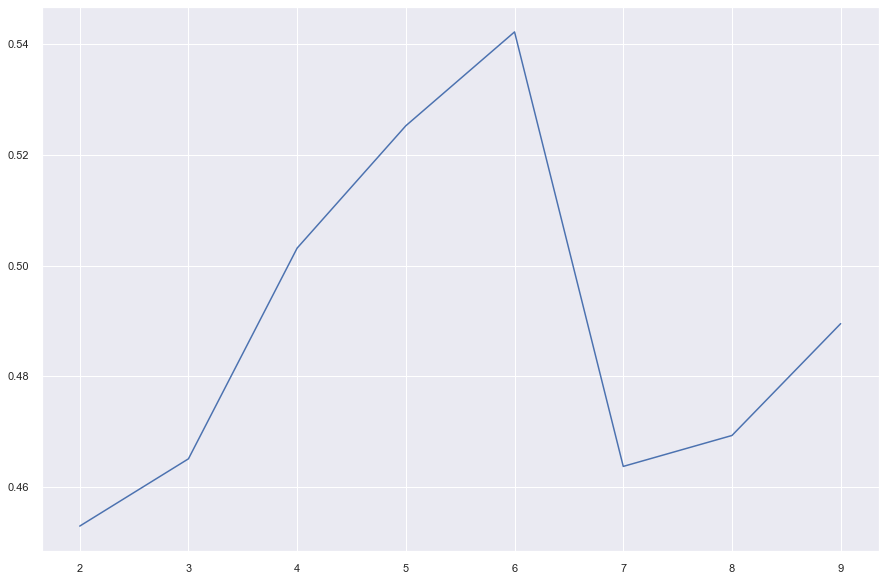

In [113]:
#creating silhouette scoree 
sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((KdfScaled))  # Predicting on the data
    score = silhouette_score(KdfScaled, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

- Cluster 6 seems to have the highest silhoutte score

In [127]:
kmeans = KMeans(n_clusters=6, random_state=0) #Applying KMeans clustering for k=6
kmeans.fit(Kdf)

KMeans(n_clusters=6, random_state=0)

In [145]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

In [146]:
data["subscribed"] = data["subscribed"].apply(lambda x: 1 if x == "yes" else 0) #changing subscribed to an int in original data

In [147]:
data.head()

,customer_id,email_id,first_name,last_name,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed,K_means_segments
0,61e41ab36fb571a283ba252b,jared84@example.org,Aaron,Austin,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,0,4
1,61e41ab36fb571a283ba252c,gsanchez@example.net,Aaron,Gray,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,0,0
2,61e41ab36fb571a283ba252d,donald41@example.net,Aaron,Walker,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,0,4
3,61e41ab36fb571a283ba252e,ariel87@example.com,Aaron,Shelton,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,0,0
4,61e41ab36fb571a283ba252f,thomasjeff@example.com,Aaron,Johnson,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,0,4


## Cluster profiles

In [148]:
cluster_profile = data.groupby("K_means_segments").mean()

In [150]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["customer_id"].count().values
)

In [151]:
# display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,age,duration,cc_contact_freq,days_since_pc,pc_contact_freq,consumer_price_index,euro_interbank_offer_rate,subscribed,count_in_each_segment
K_means_segments,,,,,,,,,
0,40.013426,93.706927,2.895159,0.109815,0.142338,93.572558,3.761550,0.022573,18695
1,40.228466,425.791102,2.275464,0.334671,0.198361,93.578424,3.446250,0.190166,5979
2,40.119658,2236.282051,2.222222,0.282051,0.094017,93.589949,3.706932,0.589744,117
3,39.446186,1199.704284,2.617555,0.244514,0.144201,93.609894,3.709385,0.594566,957
4,39.996768,232.390321,2.261133,0.300307,0.204934,93.575703,3.510513,0.101048,12687
5,40.016739,720.665575,2.387555,0.353348,0.188865,93.580506,3.530101,0.421761,2748


## Actionable Insights and Recommendations:

##### Logistic Regression Insight: 
- The logistic regression model helped us to discover the coefficients of each feature and their affect on subscription.
- Coefficient of some levels of education (university degree), job (retired and student), and a successful outcome from the previous campaign are positive so that means an increase in these will lead to increase in chances of a customer subscribing.
- Coefficient of some typs of job (blue-collar and entrepreneur), the euro interbank offer rate, and the number of contacts performed in the current campaign (cc_contact_freq) are negative so a decrease in these will lead to increase in chances of a customer subscribing.
- Holding all other features constant a 1 unit change in the number of contacts performed in the current campaign will decrease the odds of a customer subscribing by 0.95 times or a 4.60% decrease in odds of subscribing.
- Holding all other features constant a 1 unit change in the consumer_price_index will increase the odds of a customer subscribing by 30.6% increase in odds of subscribing.
- The odds of a customer subscribing is 51% less when there is an increase in the euro interbank offer rate
- The odds of a customer subscribing is 24% more when the customer has a university degree
- The odds of a customer subscribing is 5.7 more when there was a successful outcome from the previous campaign
- The odds of a customer subscribing is 0.78 times less when the customer has a blue collar job or 21.2% fewer odds of subscribing.
- The odds of a customer subscribing is 0.70 times less when the customer has a entrepreneur job or 29.3% fewer odds of subscribing.
- The odds of a customer subscribing is 41% more when the customer is retired.
- The odds of a customer subscribing is 40% more when the customer is a student.

##### Decision Tree Insight:
- Decision tree model helped us gather what feature had the most impact on whether or not a customer would subscribe in which that feature was the duration (last contacted in duration). 
- The second most important feature was the Euro Interbank Offer Rate (a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-term lending on the inter-bank market). 

##### Comparing Logistic Regression and Decision Tree: 
- Insight from the Logistic Regression was able to give us a more in depth analysis on each feature through the coefficient interpretations while the insight from the Decision Tree model is less insightful and more generalized.
- Hard to gather much from the Decision Tree other than the important features and the Decision Rules.
- Definitely think that the Logistic Regression Model was the best for this data set and creating insights from each feature and how it affects the likelihood of a customer's chance of subscribing. 

### Recommendations: 
- The most profitable customers for the bank are customers who are retired, a student, or have a university degree. The bank should target these customers before others in order to increase number of customers subscribed. 
- Through the model it has been shown that customers with the job type blue-collar and entrepreneur havea lesser chance of subscribing. The bank should not focus on these customers because they are likely not to subscribe a term deposit.
- As from the logistic regression we found that those who had a successful outcome from the previous campaign are more likely to subscribe. WIth this information, I believe that the bank should make it a point to target those customers. 
- The euro interbank offer rate is a good predictor for whether or not a customer is likely to subscribe. The bank should take this into account in which a decrease in the rate will increase the chances of a customer subscribing. 
- The Consumer Price Index is also another good predictor of whether or not a customer is likely to subscribe. Holding all other features constant a 1 unit change in the consumer_price_index will increase the odds of a customer subscribing by 30.6% increase in odds of subscribing. This means that an increase in the Consumer Price Index would increase the chances for a customer to subscribe. The bank should take the CPI in account when asking customers to subscribe. 
- The number of contacts performed in the current campaign is also another predictor for whether or not a customer subscribes. Holding all other features constant a 1 unit change in the number of contacts performed in the current campaign will decrease the odds of a customer subscribing by 0.95 times or a 4.60% decrease in odds of subscribing. This essentially means that the more often a customer is being contacted could deter a person from subscribing. The bank should avoid over contacting customers because customers can become annoyed by the amount of times they are being contacted. 